# What sectors and activities on Kiva have the most loans?

### Import packages

At the beginning of our notebooks we always import all the libraries we will use.

In [19]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
pd.options.display.mpl_style = 'default'

# the matplotlib inline command is important, it tells jupyter notebook to show the output of the cell for charts
%matplotlib inline

/Users/Sara/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
# the command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

### Import data

In [22]:
data_path = '~/intro_course_data_science_for_good/data'

In [23]:
df=pd.read_csv(data_path+'/df.csv', low_memory=False)

In [24]:
df.sample(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
47966,50936,50936,50914,Fruits & Vegetables,NaN,True,"[{'first_name': 'Neema', 'last_name': '', 'gen...",5.96,['en'],"Neema is a married woman with three kids, all ...",NaN,NaN,NaN,550,2015-02-10T17:38:02Z,832907,1803324,1,0,0,10,550,Kenya,KE,town,1 38,point,Likoni,Neema,164.0,[],2015-02-26T18:30:12Z,2015-01-27T18:30:13Z,Food,funded,[],50000.0,KES,2015-01-26T08:00:00Z,550,[],shared,0.1,lender,NaN,14,[],NaN,Lauri Fried-Lee,2210835.0,"to purchase green vegetables, two crates of to...",NaN,NaN,NaN,NaN,1,24.3,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.164711,0.085473,NaN,0.0,NaN,2081417.0,1.0,0.0,21415.0,Yehu Microfinance Trust,33.1,NaN,2.23,3.5,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2010-03-30T20:50:03Z,active,7646925.0,http://www.yehu.org
76286,85492,85492,85436,Food Stall,NaN,True,"[{'first_name': 'Fatuma', 'last_name': '', 'ge...",NaN,['en'],Fatuma is taking out another Kiva loan. She pr...,NaN,NaN,NaN,575,2013-02-24T10:39:46Z,530578,1006014,1,0,0,15,575,Kenya,KE,town,1 38,point,Likoni,Fatuma,164.0,[],2013-03-26T00:40:06Z,2013-02-24T00:40:06Z,Food,funded,[],50000.0,KES,2013-01-29T08:00:00Z,575,[],shared,0.1,lender,NaN,14,[],NaN,Emina Tudakovic,825486.0,"to purchase eggs, flour, milk, and other things.",NaN,NaN,NaN,NaN,1,24.3,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.164711,0.085473,NaN,0.0,NaN,2081417.0,1.0,0.0,21415.0,Yehu Microfinance Trust,33.1,NaN,2.23,3.5,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2010-03-30T20:50:03Z,active,7646925.0,http://www.yehu.org


### Agriculture and Food account for more than 50% of all loans in Kenya

The pie chart below shows that agriculuture and food have the most loans in Kenya.

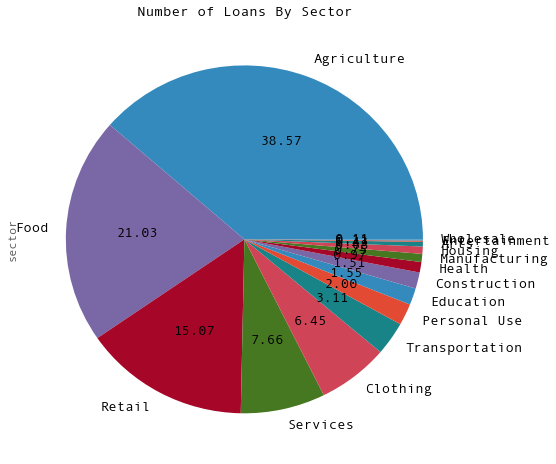

In [25]:
df['sector'].value_counts().plot(kind='pie',title='Number of Loans By Sector',fontsize=14,  autopct='%.2f',figsize=(8, 8))
plt.savefig('module_1_images/sector.png')

What is the average loan amount for each sector? We see that Agriculture has the largest average loan value.

In [26]:
df.groupby('sector')['loan_amount'].mean()

sector
Agriculture        563.734169
Arts               406.397638
Clothing           429.577926
Construction       439.261651
Education          876.895799
Entertainment      476.286765
Food               379.565182
Health            1031.538797
Housing            512.875000
Manufacturing      546.231721
Personal Use       242.357294
Retail             490.601514
Services           452.595146
Transportation     514.767473
Wholesale          590.485075
Name: loan_amount, dtype: float64

### Health care and education loans have the highest average loan amounts requested

We can also visualize this as a bar chart. The chart below shows that on average Health care and Education loans have the highest amounts. The average health care loan is over $1000 for example.

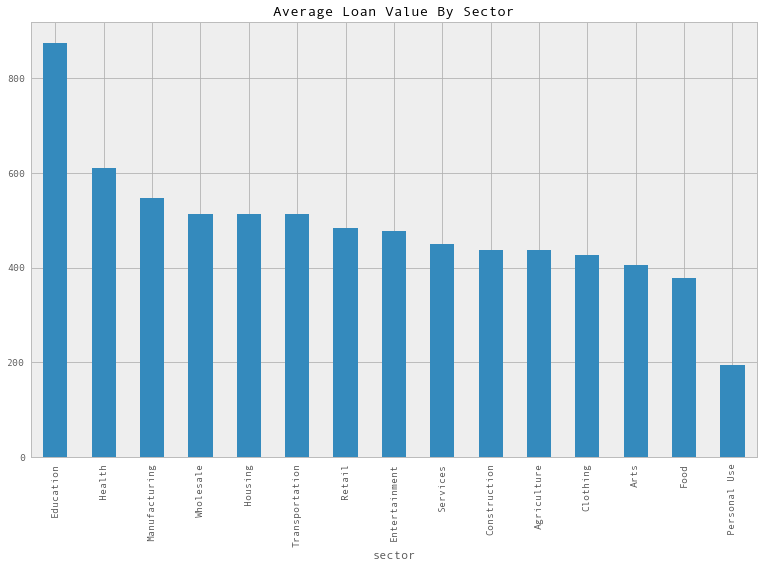

In [27]:
df[df['borrower_count']==1].groupby('sector')['loan_amount'].mean().nlargest(20).plot(kind="bar", title="Average Loan Value By Sector",figsize=(13, 8))

In [28]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
0,0,0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/
1,1,1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386.0,[],2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/


Below, we plot the total amount of dollars in each sector. Agriculture still comes out on top.

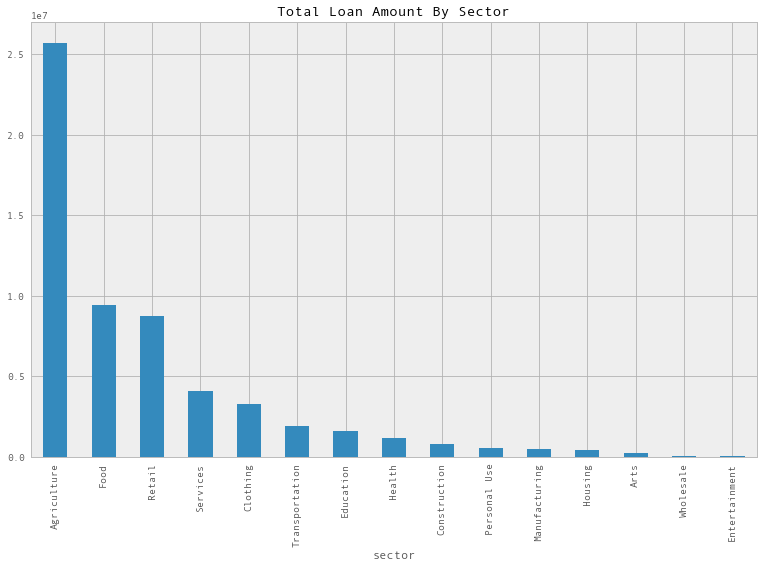

In [29]:
df.groupby('sector')['loan_amount'].sum().nlargest(20).plot(kind="bar", title="Total Loan Amount By Sector", figsize=(13, 8))

## Farming activities tend to have the highest number of loans.

We can also look at the distribution of loans by activity.

There are 149 different activities

 Looking at the number of loans by the top 15 activites


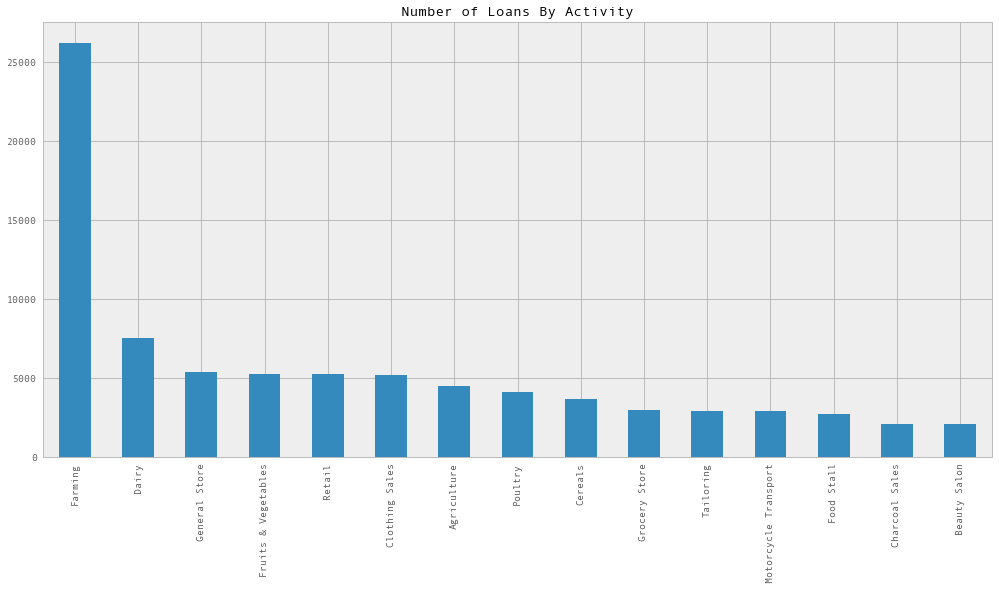

In [30]:
print("There are %d different activities" % df.activity.value_counts().size)
print("\n Looking at the number of loans by the top 15 activites")
df.activity.value_counts().nlargest(15).plot(kind='bar',figsize=(17,8), title="Number of Loans By Activity")
plt.savefig('module_1_images/activity.png')

Since we know agriculture loans tend to be larger on average, it would be interesting to see if they tend to have more borrowers.

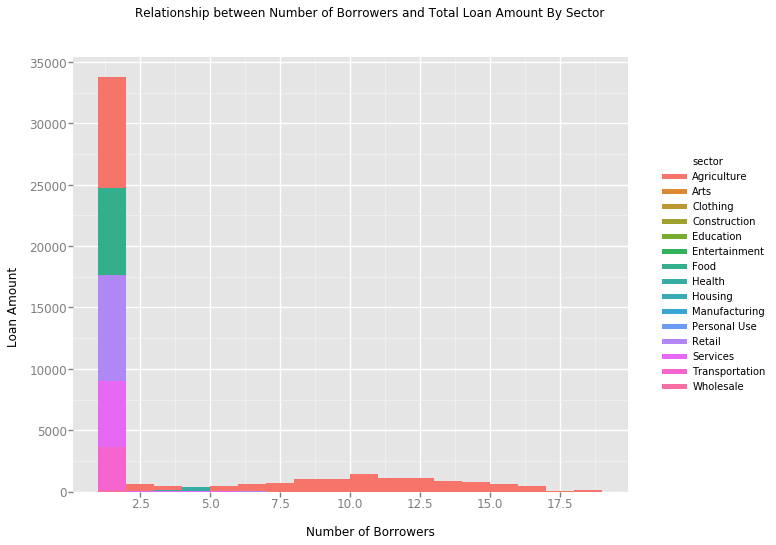

<ggplot: (-9223372036547160551)>

In [31]:
ggplot(df[df['borrower_count'] < 20], aes(x='borrower_count', fill='sector')) +\
    geom_histogram(binwidth=1) + \
ggtitle("Relationship between Number of Borrowers and Total Loan Amount By Sector") + xlab("Number of Borrowers") + ylab("Loan Amount")

We were right, this was worth investigating. We see that the bulk of all loans only have a single borrower, but agriculture loans tends to be outliers and much more likely to have multiple borrowers.

To get a feel of the difference between sectors, we can look a description using the code below.

In [32]:
df['sector'].unique()

array(['Agriculture', 'Manufacturing', 'Personal Use', 'Clothing', 'Food',
       'Education', 'Transportation', 'Housing', 'Services', 'Retail',
       'Wholesale', 'Health', 'Arts', 'Construction', 'Entertainment'], dtype=object)

In [37]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
0,0,0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/


In [46]:
df[df['sector']=='Entertainment'].iloc[10][1]

36499

In [34]:
df.to_csv('~/intro_course_data_science_for_good/data/df_module.csv')